In [3]:
pip install tensorflow==2.18.0

  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl.metadata (14 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.4.26-

In [7]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.2 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.2 MB 3.9 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.2 MB 4.8 MB/s eta 0:00:02
   --------------- ------------------------ 4.5/11.2 MB 5.8 MB/s eta 0:00:02
   ---------------------------- ----------- 7.9/11.2 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.2 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.2 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------- 11.2/11.2 MB 7.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---- ----------------------------------- 5.2/46.2 MB 29.0 MB/s eta 0:00:02
   --------- ------------------------------ 11.0/46.2 MB 25.5 MB/s eta 0:00:02
   --------------- ------------------------ 17.8/46.2 MB 24.4 MB/s eta 0:00:02
   --

##  R√©sum√© du Code : Pr√©paration des Donn√©es Vid√©o pour la D√©tection de Chutes

Ce script a pour but de **pr√©parer les donn√©es d'entra√Ænement** pour un mod√®le de **pr√©diction de chutes** √† partir de vid√©os.

---

###  √âtapes Cl√©s :

-  **Chargement des vid√©os** √† partir de deux dossiers :
  -  Vid√©os de **chutes** ‚Üí `label = 0`
  -  Vid√©os **normales** ‚Üí `label = 1`

-  **Extraction de 30 images** (frames) par vid√©o

-  **Redimensionnement des images** √† `128 √ó 128` pixels

-  **Cr√©ation des s√©quences** de donn√©es et **encodage des labels** en **one-hot**

-  **Division des donn√©es** :
  - **95%** pour l'entra√Ænement  
  - **5%** pour les tests

---

In [10]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)

TensorFlow version: 2.18.0
Keras version: 3.10.0


In [11]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
# Param√®tres
SEQUENCE_LENGTH = 30
IMG_SIZE = (128, 128) 
TEST_RATIO = 0.05
# Chemins
VIDEO_PATH_CHUTES = r"../data/dataAlgorithme1/VideoChute"
VIDEO_PATH_NORMAUX = r"../data/dataAlgorithme1/videoNormal"
def extract_frames(video_path, num_frames=SEQUENCE_LENGTH):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while len(frames) < num_frames and cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, IMG_SIZE)
        frames.append(frame)
    cap.release()
    return np.array(frames[:num_frames])
# Chargement des donn√©es
X, y = [], []
# Vid√©os de chute (label 0)
for video_file in os.listdir(VIDEO_PATH_CHUTES):
    video_path = os.path.join(VIDEO_PATH_CHUTES, video_file)
    sequence = extract_frames(video_path)
    if len(sequence) == SEQUENCE_LENGTH:
        X.append(sequence)
        y.append(0)
# Vid√©os normales (label 1)
for video_file in os.listdir(VIDEO_PATH_NORMAUX):
    video_path = os.path.join(VIDEO_PATH_NORMAUX, video_file)
    sequence = extract_frames(video_path)
    if len(sequence) == SEQUENCE_LENGTH:
        X.append(sequence)
        y.append(1)
# Conversion et split
X = np.array(X)
y = to_categorical(np.array(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_RATIO, stratify=y)
print(f"Donn√©es pr√©par√©es : {X_train.shape} (train), {X_test.shape} (test)")

FileNotFoundError: [WinError 3] Le chemin d‚Äôacc√®s sp√©cifi√© est introuvable: '../data/dataAlgorithme1/VideoChute'

# üîπ  Construction du Mod√®le
---

# üîπ  Explication d√©taill√©e du mod√®le de d√©tection de chute
---

### üîπ  Import des librairies
On importe les fonctions n√©cessaires pour construire, entra√Æner et √©valuer le mod√®le :  
`Sequential`, `TimeDistributed`, `Conv2D`, `MaxPooling2D`, `BatchNormalization`, `LSTM`, `EarlyStopping`, `matplotlib` et `numpy`.

---

### üîπ  Architecture du mod√®le
- **TimeDistributed Conv2D (32 filtres, 3x3)** : applique une couche convolutionnelle √† chaque image de la s√©quence.  
- **TimeDistributed BatchNormalization** : normalise les activations pour stabiliser l‚Äôentra√Ænement.  
- **TimeDistributed MaxPooling2D** : r√©duit la taille des images en gardant les infos importantes.  
- **TimeDistributed Dropout(0.5)** : √©vite le sur-apprentissage en d√©sactivant al√©atoirement 50% des neurones.  
- **TimeDistributed Conv2D (64 filtres, 3x3)** : extraie des caract√©ristiques plus complexes.  
- **TimeDistributed GlobalMaxPooling2D** : convertit chaque image en un vecteur compact.  
- **LSTM(128, return_sequences=True)** : apprend les d√©pendances temporelles en sortie pour chaque image.  
- **LSTM(64)** : r√©sume la s√©quence en un vecteur global.  
- **Dense(32, activation='relu')** : apprend des combinaisons non lin√©aires.  
- **Dense(2, activation='softmax')** : sortie finale avec probabilit√©s pour les 2 classes.

---

### üîπ  Compilation du mod√®le
- `loss='categorical_crossentropy'` : adapt√©e √† la classification multiclasse.  
- `optimizer='adam'` : optimise efficacement le mod√®le.  
- `metrics=['accuracy']` : suit la pr√©cision du mod√®le.

---

### üîπ  Entra√Ænement
- Utilisation des donn√©es `X_train`, `y_train` avec validation sur `X_test`, `y_test`.  
- `epochs=50`, `batch_size=8`.  
- `EarlyStopping` pour arr√™ter si la perte de validation ne s‚Äôam√©liore pas apr√®s 10 √©poques.

---

### üîπ  Visualisation des r√©sultats
Affiche les courbes d‚Äôaccuracy sur l‚Äôentra√Ænement et la validation pour suivre l‚Äôapprentissage.

---

### üîπ  √âvaluation finale
- Pr√©dictions sur `X_test`.  
- Calcul et affichage de la matrice de confusion pour mesurer la performance en d√©tail.

---


2/2




















Epoch 1/50
6/6 [==============================] - 96s 11s/step - loss: 0.7182 - accuracy: 0.5417 - val_loss: 0.6295 - val_accuracy: 0.9231
Epoch 2/50
6/6 [==============================] - 59s 10s/step - loss: 0.6655 - accuracy: 0.5417 - val_loss: 0.5912 - val_accuracy: 0.8462
Epoch 3/50
6/6 [==============================] - 63s 10s/step - loss: 0.6049 - accuracy: 0.7917 - val_loss: 0.5706 - val_accuracy: 0.5385
Epoch 4/50
6/6 [==============================] - 49s 8s/step - loss: 0.5457 - accuracy: 0.7917 - val_loss: 0.4930 - val_accuracy: 0.6154
Epoch 5/50
6/6 [==============================] - 55s 10s/step - loss: 0.4278 - accuracy: 0.8542 - val_loss: 0.6801 - val_accuracy: 0.5385
Epoch 6/50
6/6 [==============================] - 69s 12s/step - loss: 0.4043 - accuracy: 0.8333 - val_loss: 0.3506 - val_accuracy: 0.8462
Epoch 7/50
6/6 [==============================] - 63s 10s/step - loss: 0.3762 - accuracy: 0.8125 - val_loss: 0.1934 - val_accuracy: 1.0000
Epoch 8/50
6/6 [============

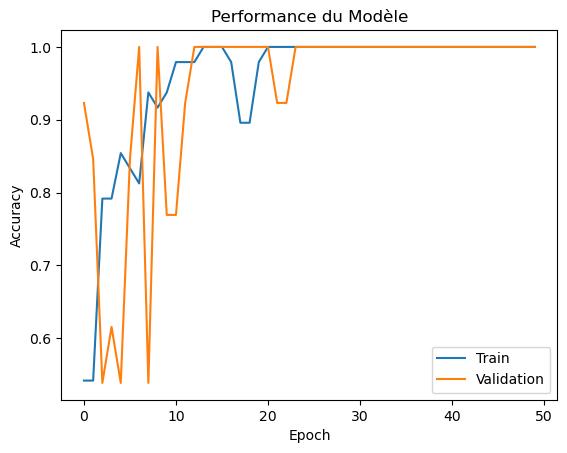

1/1 [==============================] - 3s 3s/step
[[7 0]
 [0 6]]


In [ ]:
from keras.models import Sequential
from keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, LSTM, Dense
from keras.layers import Dropout, BatchNormalization, GlobalMaxPooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
model = Sequential([
    TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=(SEQUENCE_LENGTH, *IMG_SIZE, 3)),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D()),
    TimeDistributed(Dropout(0.5)),
    TimeDistributed(Conv2D(64, (3, 3), activation='relu')),
    TimeDistributed(GlobalMaxPooling2D()),  # ou Flatten()
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=8,
    callbacks=[EarlyStopping(patience=10, monitor='val_loss')]
)
# Courbes d'apprentissage
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Performance du Mod√®le')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
# Matrice de confusion
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(confusion_matrix(y_true, y_pred))

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

# ----------------------------------------
print("\033[94m# Visualisation de l‚Äôarchitecture du mod√®le Keras\033[0m")
print("\033[94m" + "-"*50 + "\033[0m\n")

# 1. Import des modules n√©cessaires (fait ci-dessus)

# ----------------------------------------
print("\033[94m# 2. G√©n√©ration de l‚Äôimage PNG du mod√®le\033[0m")
print("\033[94m" + "-"*50 + "\033[0m\n")

# G√©n√®re le mod√®le sous forme d‚Äôun fichier PNG avec formes et noms des couches
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# ----------------------------------------
print("\033[94m# 3. Affichage de l‚Äôimage dans le notebook\033[0m")
print("\033[94m" + "-"*50 + "\033[0m\n")

# Affiche l‚Äôimage PNG dans le notebook (ou IPython)
display(Image("model.png"))


C:\Users\Alif computer\AppData\Local\Temp\ipykernel_10680\175596281.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


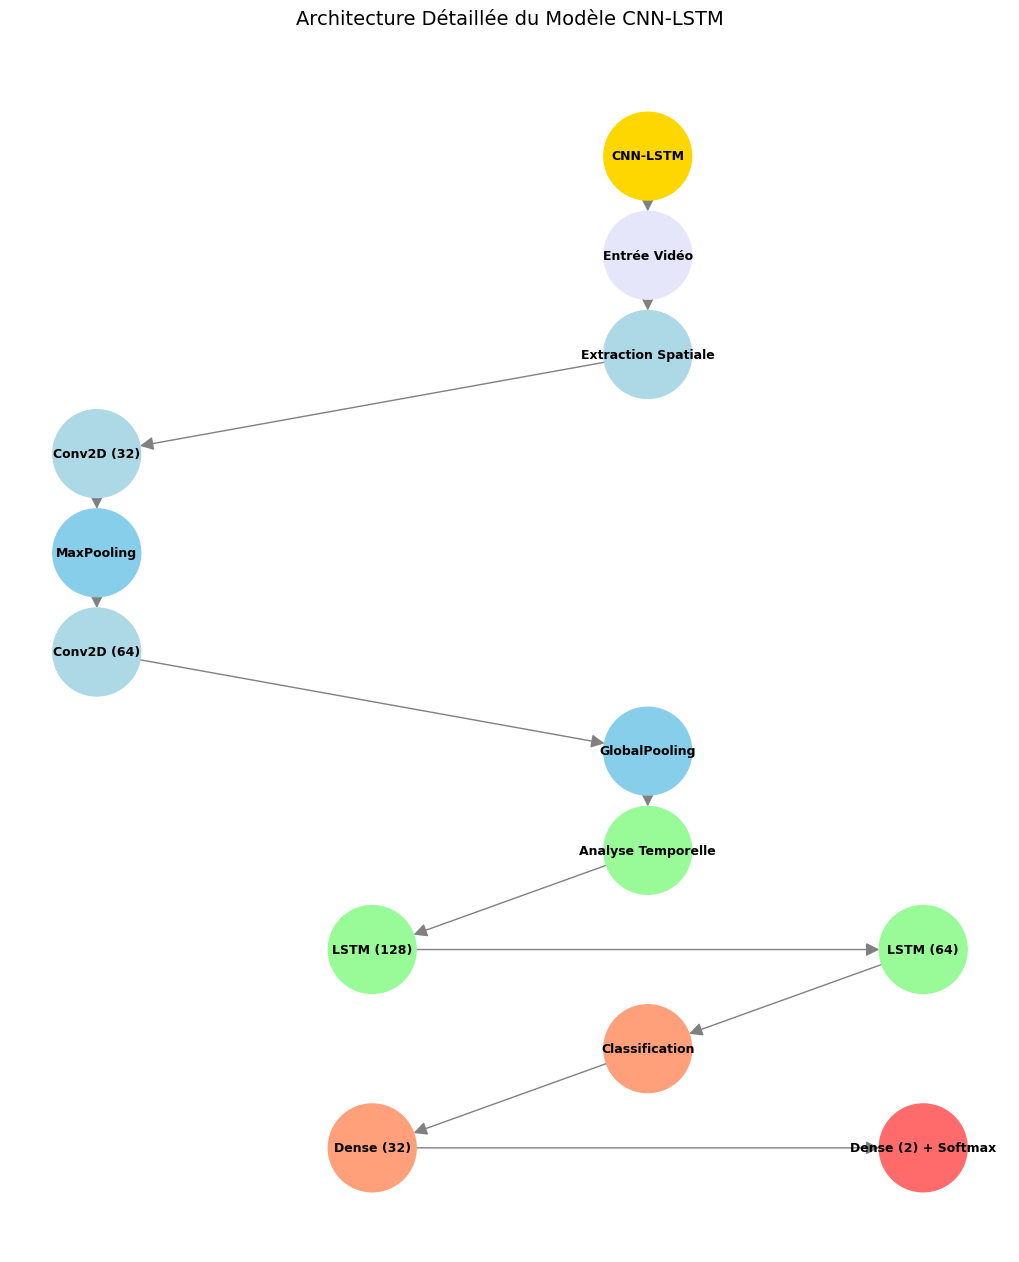

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_detailed_mindmap():
    G = nx.DiGraph()
    G.add_edges_from([
        ("CNN-LSTM", "Entr√©e Vid√©o"),
        ("Entr√©e Vid√©o", "Extraction Spatiale"),
        ("Extraction Spatiale", "Conv2D (32)"),
        ("Conv2D (32)", "MaxPooling"),
        ("MaxPooling", "Conv2D (64)"),
        ("Conv2D (64)", "GlobalPooling"),
        ("GlobalPooling", "Analyse Temporelle"),
        ("Analyse Temporelle", "LSTM (128)"),
        ("LSTM (128)", "LSTM (64)"),
        ("LSTM (64)", "Classification"),
        ("Classification", "Dense (32)"),
        ("Dense (32)", "Dense (2) + Softmax")
    ])
    pos = {
        "CNN-LSTM": (0, 2),
        "Entr√©e Vid√©o": (0, 1.5),
        "Extraction Spatiale": (0, 1),
        "Conv2D (32)": (-1, 0.5),
        "MaxPooling": (-1, 0),
        "Conv2D (64)": (-1, -0.5),
        "GlobalPooling": (0, -1),
        "Analyse Temporelle": (0, -1.5),
        "LSTM (128)": (-0.5, -2),
        "LSTM (64)": (0.5, -2),
        "Classification": (0, -2.5),
        "Dense (32)": (-0.5, -3),
        "Dense (2) + Softmax": (0.5, -3)
    }
    node_colors = {
        "CNN-LSTM": "#FFD700",
        "Entr√©e Vid√©o": "#E6E6FA",
        "Extraction Spatiale": "#ADD8E6",
        "Conv2D (32)": "#ADD8E6",
        "MaxPooling": "#87CEEB",
        "Conv2D (64)": "#ADD8E6",
        "GlobalPooling": "#87CEEB",
        "Analyse Temporelle": "#98FB98",
        "LSTM (128)": "#98FB98", 
        "LSTM (64)": "#98FB98",
        "Classification": "#FFA07A",
        "Dense (32)": "#FFA07A",
        "Dense (2) + Softmax": "#FF6B6B"
    }
    plt.figure(figsize=(10, 12))
    nx.draw(G, pos, 
            with_labels=True,
            node_size=4000,
            node_color=[node_colors[n] for n in G.nodes()],
            font_size=9,
            font_weight='bold',
            arrowsize=20,
            edge_color='gray')
    plt.title("Architecture D√©taill√©e du Mod√®le CNN-LSTM", fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()

draw_detailed_mindmap()

In [ ]:
from keras.models import Sequential
from keras.layers import TimeDistributed, Conv2D, MaxPooling2D, LSTM, Dense
from keras.layers import Dropout, BatchNormalization, GlobalMaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.regularizers import l2
from keras.optimizers import Adam
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import numpy as np
SEQUENCE_LENGTH = 30 
IMG_SIZE = (128, 128)   
BATCH_SIZE = 16      
class_weights = class_weight.compute_class_weight('balanced', 
                                                classes=np.unique(np.argmax(y_train, axis=1)), 
                                                y=np.argmax(y_train, axis=1))
class_weights = dict(enumerate(class_weights))
model = Sequential([
    TimeDistributed(Conv2D(64, (3, 3), activation='relu', padding='same', 
                      kernel_regularizer=l2(0.01)), 
    input_shape=(SEQUENCE_LENGTH, *IMG_SIZE, 3)),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D((2, 2))),
    TimeDistributed(Dropout(0.4)),  
    TimeDistributed(Conv2D(128, (3, 3), activation='relu', padding='same',
                      kernel_regularizer=l2(0.01))),
    TimeDistributed(GlobalMaxPooling2D()),
    LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3),
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),  
    Dense(2, activation='softmax')
])
optimizer = Adam(learning_rate=0.0001)  
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', 'Recall'])  
callbacks = [
    EarlyStopping(monitor='val_recall', patience=15, mode='max', 
                 restore_best_weights=True),
    ModelCheckpoint('best_fall_detection1.h5', monitor='val_recall', 
                  save_best_only=True),
    ReduceLROnPlateau(monitor='val_recall', factor=0.2, patience=5, min_lr=1e-6)
]
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,  
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    class_weight=class_weights  
)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy au Cours de l\'Entra√Ænement')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Rappel (Recall) au Cours de l\'Entra√Ænement')
plt.legend()
plt.show()
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print("Matrice de Confusion:")
print(confusion_matrix(y_true, y_pred))
print("\nRapport de Classification:")
print(classification_report(y_true, y_pred, target_names=["Non-Chute", "Chute"]))

Epoch 1/100
4/4 [==============================] - 436s 86s/step - loss: 2.2066 - accuracy: 0.5789 - recall: 0.5789 - val_loss: 2.3018 - val_accuracy: 0.2500 - val_recall: 0.2500 - lr: 1.0000e-04
Epoch 2/100
4/4 [==============================] - 354s 80s/step - loss: 2.2111 - accuracy: 0.5965 - recall: 0.5965 - val_loss: 2.3031 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 3/100
4/4 [==============================] - 324s 78s/step - loss: 2.1894 - accuracy: 0.6140 - recall: 0.6140 - val_loss: 2.2967 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 1.0000e-04
Epoch 4/100
4/4 [==============================] - 412s 87s/step - loss: 2.2319 - accuracy: 0.4912 - recall: 0.4912 - val_loss: 2.2692 - val_accuracy: 0.5000 - val_recall: 0.5000 - lr: 1.0000e-04
Epoch 5/100
4/4 [==============================] - 350s 82s/step - loss: 2.1851 - accuracy: 0.5789 - recall: 0.5789 - val_loss: 2.2507 - val_accuracy: 0.5000 - val_recall: 0.5000 - lr: 1.0000e-04
Epoc

In [4]:
model.save('fall_prediction_model.h5')

üß† test sur une video

In [5]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# === PARAM√àTRES ===
IMG_SIZE = (128, 128)
SEQUENCE_LENGTH = 30
CLASSES = ['Fall', 'No Fall']
VIDEO_PATH = r"../data/datatest/testAlgorithme1/videotest2.mp4"
MODEL_PATH = "best_fall_detection.h5"

# === CHARGER LE MOD√àLE ===
model = load_model(MODEL_PATH)
print("Mod√®le charg√© avec succ√®s.")
model.summary()

# === EXTRAIRE FRAMES ===
def extract_frames(video_path, seq_length=SEQUENCE_LENGTH, img_size=IMG_SIZE):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while len(frames) < seq_length:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, img_size)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  
        frames.append(frame)
    cap.release()
    if len(frames) < seq_length:
        print(f"Vid√©o trop courte ({len(frames)} frames, besoin de {seq_length})")
        return None
    frames = np.array(frames) / 255.0
    frames = np.expand_dims(frames[:seq_length], axis=0) 
    print("Forme de l'entr√©e pour le mod√®le :", frames.shape)
    return frames
# === FAIRE UNE PR√âDICTION ===
def predict_video(video_path):
    sequence = extract_frames(video_path)
    if sequence is None:
        return
    prediction = model.predict(sequence)
    predicted_class = CLASSES[np.argmax(prediction)]
    print("Pr√©diction :", predicted_class)
    print("Probabilit√©s :", prediction[0])
    # Affichage vid√©o
    sequence_np = (sequence[0] * 255).astype(np.uint8)
    for frame in sequence_np:
        frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        cv2.putText(frame_bgr, f"Prediction: {predicted_class}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        cv2.imshow("Video Prediction", frame_bgr)
        if cv2.waitKey(100) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()
# === LANCER LA PR√âDICTION ===
predict_video(VIDEO_PATH)

Mod√®le charg√© avec succ√®s.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, 30, 128, 128, 64)  1792     
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 30, 128, 128, 64)  256      
 tributed)                                                       
                                                                 
 time_distributed_8 (TimeDis  (None, 30, 64, 64, 64)   0         
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 30, 64, 64, 64)   0         
 tributed)                                                       
                                                                 
 time_distributed_10 (Ti